In [45]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import peakutils as pk
from peakutils.plot import plot as pplot
from scipy.interpolate import CubicSpline
import scipy.constants as const

In [2]:
data_file = "data/20170721-Ar-H-Torch.txt"

In [3]:
data = np.loadtxt(data_file, skiprows=14)

In [4]:
data_smoothed = sig.spline_filter(data)
print(data.shape)
print(data_smoothed.shape)

(2048, 2)
(2048, 2)


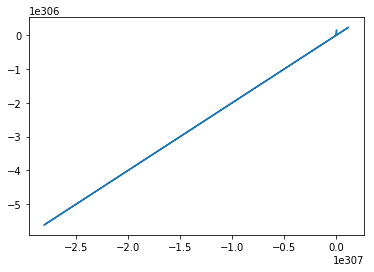

In [5]:
#plt.plot(data[:,0], data[:,1])
plt.plot(data_smoothed[:,0], data_smoothed[:,1])
plt.show()

In [6]:
data_filtered = sig.savgol_filter(data, window_length=11, polyorder=5, axis=0)

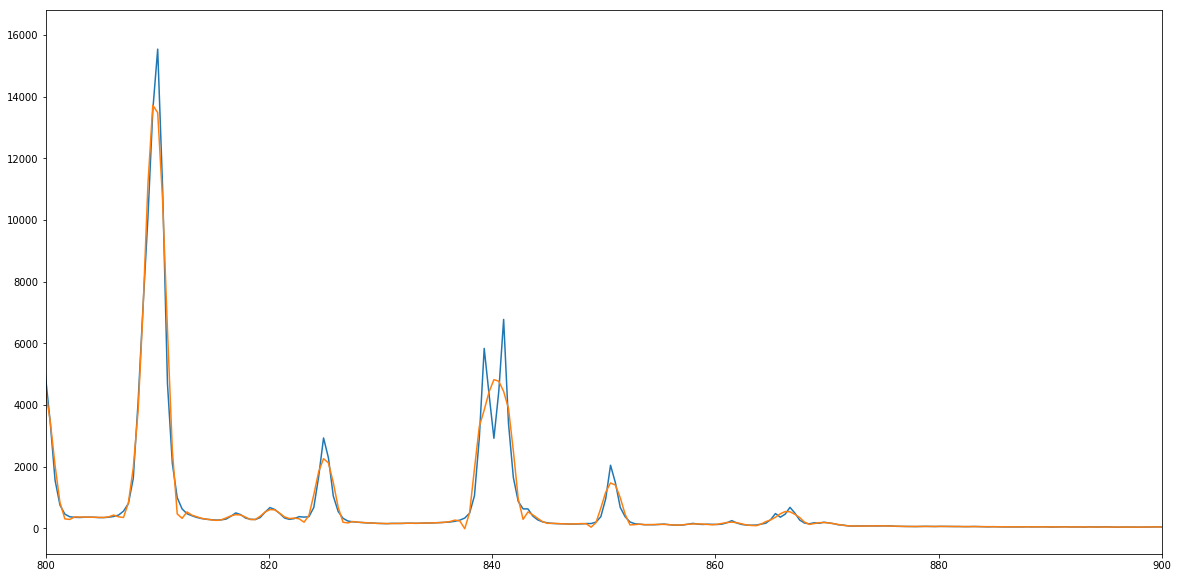

In [9]:
data_filtered = sig.savgol_filter(data, window_length=11, polyorder=5, axis=0)
plt.figure(1, figsize=(20, 10))
plt.plot(data[:,0], data[:,1])
plt.plot(data_filtered[:,0], data_filtered[:,1])
plt.xlim(800, 900)
#plt.ylim(0, 2000)
plt.show()

In [10]:
cal = np.loadtxt("suspect_calibration_data/CalibrationFile.txt")

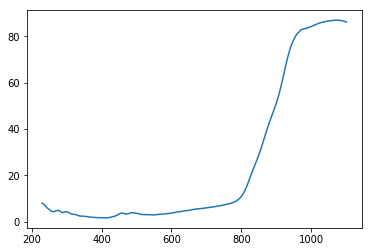

In [62]:
plt.plot(cal[:,0], cal[:,1])
#plt.plot(data[:,0], data[:,1])
plt.show()

In [12]:
cal.shape

(175, 2)

In [58]:
recovered, remainder = sig.deconvolve(data[:,1], interp(data[:,1]))

In [59]:
recovered.shape

(1,)

In [17]:
data.shape

(2048, 2)

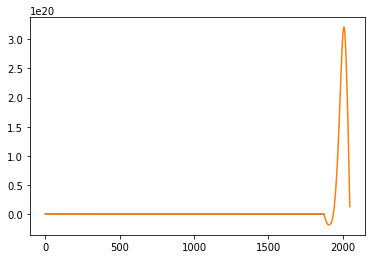

In [19]:
plt.plot(recovered)
plt.plot(remainder)
plt.show()

In [21]:
interp = CubicSpline(cal[:,0], cal[:,1])

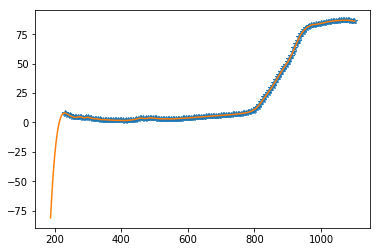

In [65]:
plt.plot(cal[:,0], cal[:,1], '*')
plt.plot(data[:,0], interp(data[:,0]))
plt.show()

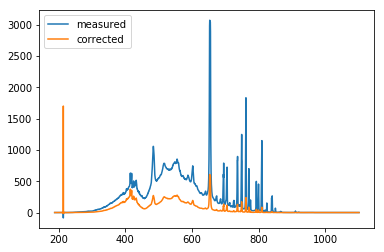

In [66]:
plt.plot(data[:,0], data[:,1], label="measured")
plt.plot(data[:,0], data[:,1] / interp(data[:,0]), label="corrected")
plt.legend(loc="upper left")
plt.show()

[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]


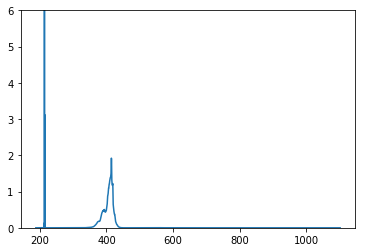

In [77]:
cal_data = data
cal_data[:,1] = np.divide(cal_data[:,1], interp(data[:,0]))
print(cal_data == data)
plt.plot(cal_data[:,0], cal_data[:,1])
plt.ylim(0,6)
plt.show()

In [26]:
def black_body(temperature, wavelength):
    h = const.Planck
    c = const.c
    k = const.Boltzmann
    
    l = wavelength
    
    numerator = 2 * h * c ** 2 / l ** 5
    denominator = np.exp(h * c / (l * k * temperature)) - 1
    
    return numerator / denominator

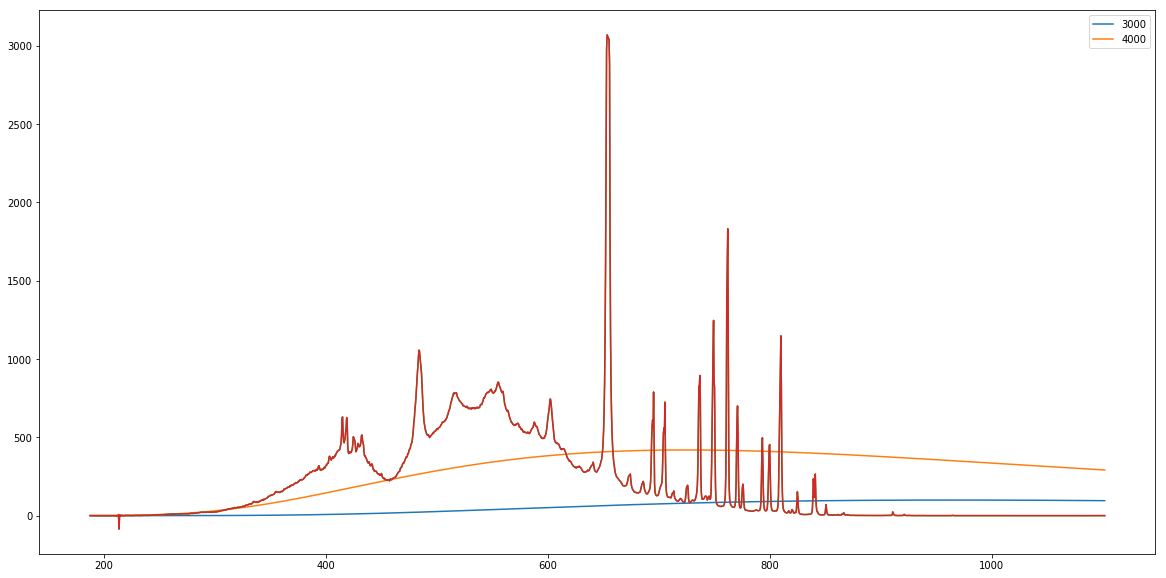

In [61]:
plt.figure(figsize=(20,10))
temperatures = [3000, 4000]
for t in temperatures:
    plt.plot(cal_data[:,0], black_body(t, cal_data[:,0] * 1e-9) * 1e-10, label=t)
plt.plot(cal_data[:,0], cal_data[:,1])
plt.plot(data[:,0], data[:,1])
plt.legend(loc="upper right")
plt.show()

# Let's find the peaks

[ 479  487  495  500  502  508  517  525  637  655  665  673  684  687
  706  711  725  732  734  737  739  743  745  747  749  752  759  765
  773  778  780  787  794  803  813  821  824  828  830  833  838  841
  845  847  850  853  866  881  885  898  909  912  915  920  923 1012
 1104 1106 1127 1129 1200 1228 1257 1277 1328 1343 1366]
[411.522 415.208 418.893 421.195 422.115 424.876 429.016 432.694 484.015
 492.233 496.794 500.442 505.455 506.821 515.47  517.745 524.11  527.291
 528.2   529.562 530.47  532.287 533.195 534.103 535.01  536.372 539.548
 542.269 545.895 548.161 549.067 552.238 555.407 559.48  564.004 567.62
 568.976 570.784 571.687 573.042 575.3   576.655 578.46  579.363 580.717
 582.07  587.933 594.692 596.493 602.345 607.293 608.642 609.99  612.238
 613.586 653.47  694.478 695.367 704.696 705.584 737.032 749.397 762.182
 770.986 793.388 799.964 810.035] [ 418.03122248  630.52281063  625.51627676  406.29859283  406.31838348
  503.7317242   460.79031318  514.99752659 1

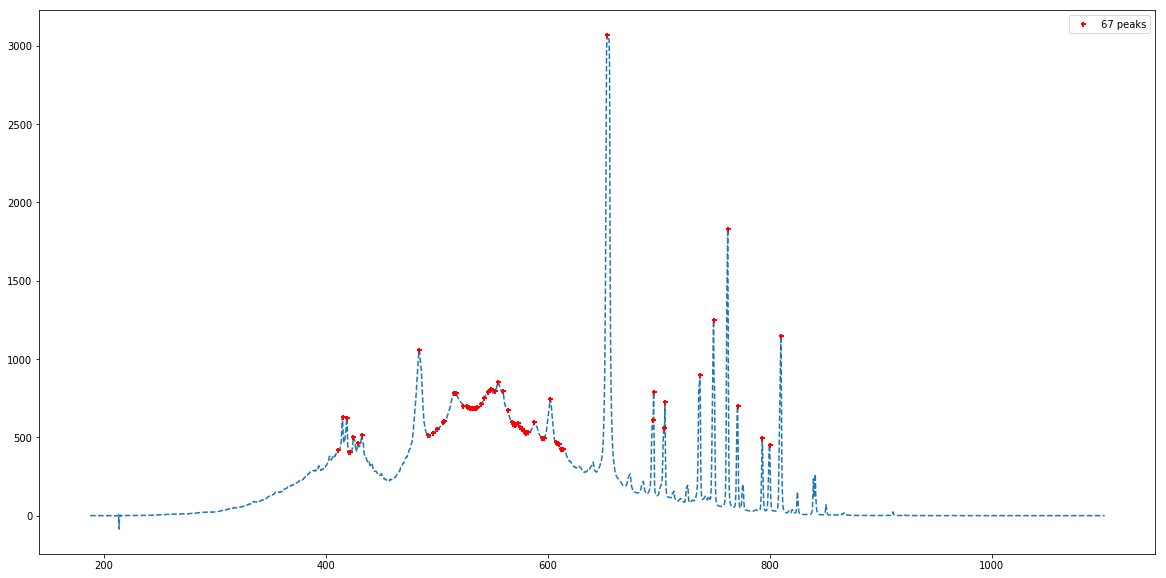

In [57]:
indexes = pk.indexes(cal_data[:,1], thres=0.15, min_dist=0.5)
print(indexes)
print(cal_data[indexes, 0], cal_data[indexes, 1])
plt.figure(figsize=[20, 10])
pplot(cal_data[:,0], cal_data[:,1], indexes)
#plt.xlim(400, 500)
plt.show()